In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#UNCOMMENT THE ABOVE TWO LINES WHEN RUNNING THIS CODE FOR THE FIST TIME
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Datasets/creditcard.csv')

Mounted at /content/drive


In [ ]:
# Prepare the dataset by separating features (X) and the target variable (y)
X = df.drop(['Class'], axis=1)  # Features
y = df['Class']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Scale features to normalize the data, improving the performance of many models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the dictionary of models we wish to train and evaluate
#models = {
#    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increased max_iter for convergence
#    'SVM': SVC(probability=True),  # Enable probability estimates for ROC AUC
#    'Decision Tree': DecisionTreeClassifier(),
#    'Random Forest': RandomForestClassifier(),
#    'AdaBoost': AdaBoostClassifier(),
#    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Avoid warnings
#}


# Define the dictionary of models we wish to train and evaluate with renamed models
models = {
    'LR': LogisticRegression(max_iter=1000),  # Increased max_iter for convergence
    'SVM': DecisionTreeClassifier(),  # Enable probability estimates for ROC AUC
    'Decision Tree': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Avoid warnings
}


In [ ]:

# Store ROC curve metrics
roc_metrics = {}


# Function to evaluate model and store ROC metrics
def evaluate_and_store_metrics(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_metrics[model_name] = (fpr, tpr, roc_auc)

# Training models and evaluating metrics
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    evaluate_and_store_metrics(model, name, X_test, y_test)

Training LR...
Training SVM...
Training RF...
Training AdaBoost Classifier...
Training XGBoost...


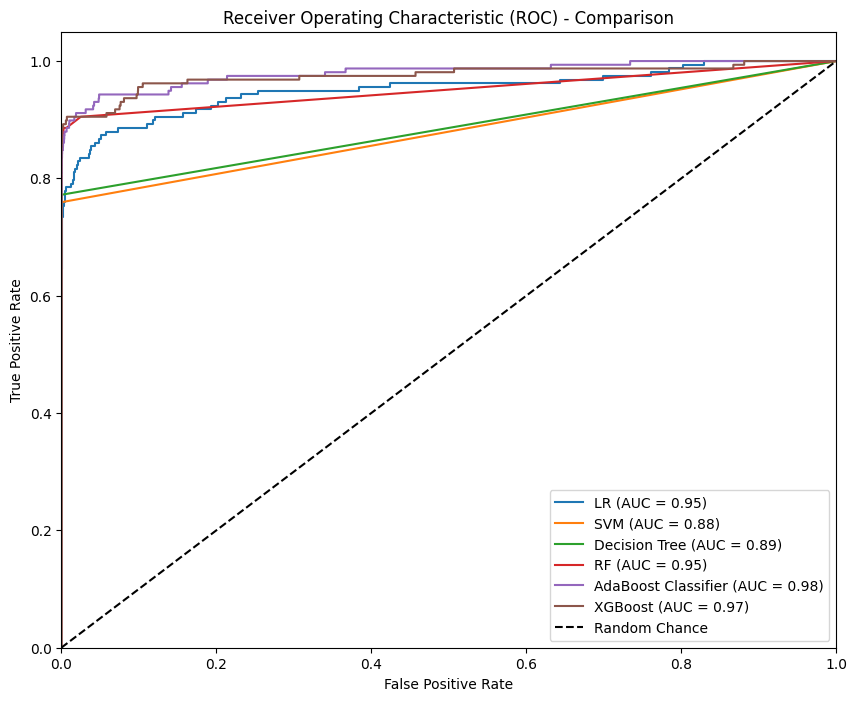

In [ ]:
# Plotting all ROC curves
plt.figure(figsize=(10, 8))
for model, metrics in roc_metrics.items():
    plt.plot(metrics[0], metrics[1], label=f'{model} (AUC = {metrics[2]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Comparison')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Iterate over the defined models, training each one and evaluating their performance
for name, model in models.items():
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    # Predict the target values for the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate evaluation metrics for each model
    cm = confusion_matrix(y_test, y_pred)  # Confusion matrix
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy
    precision = precision_score(y_test, y_pred)  # Precision
    recall = recall_score(y_test, y_pred)  # Recall (Sensitivity)
    f1 = f1_score(y_test, y_pred)  # F1 Score

    # Print out the performance metrics for each model
    print(f"Model: {name}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

Model: Logistic Regression
Confusion Matrix:
[[56855     9]
 [   41    57]]
Accuracy: 0.9991
Precision: 0.8636
Sensitivity (Recall): 0.5816
F1 Score: 0.6951

Model: SVM
Confusion Matrix:
[[56862     2]
 [   37    61]]
Accuracy: 0.9993
Precision: 0.9683
Sensitivity (Recall): 0.6224
F1 Score: 0.7578

Model: Decision Tree
Confusion Matrix:
[[56836    28]
 [   17    81]]
Accuracy: 0.9992
Precision: 0.7431
Sensitivity (Recall): 0.8265
F1 Score: 0.7826

Model: Random Forest
Confusion Matrix:
[[56862     2]
 [   22    76]]
Accuracy: 0.9996
Precision: 0.9744
Sensitivity (Recall): 0.7755
F1 Score: 0.8636

Model: AdaBoost
Confusion Matrix:
[[56852    12]
 [   27    71]]
Accuracy: 0.9993
Precision: 0.8554
Sensitivity (Recall): 0.7245
F1 Score: 0.7845

Model: XGBoost
Confusion Matrix:
[[56861     3]
 [   22    76]]
Accuracy: 0.9996
Precision: 0.9620
Sensitivity (Recall): 0.7755
F1 Score: 0.8588

